# Data Visualization with Seaborn

Before we start, we need to install seaborn. 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Data from here <href>https://www.kaggle.com/uciml/adult-census-income</href>

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
len(df)

32561

In order to better illustrate some of the plots, let's sample only 500 observations. But you shouldn't do it unless you have a good reason.

In [4]:
df=df.sample(500,random_state=1)

In [5]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.044819,-0.003402,0.068986,0.067976,0.088779
fnlwgt,-0.044819,1.000000,0.014280,-0.035879,-0.058480,-0.019102
education.num,-0.003402,0.014280,1.000000,0.128262,0.143796,0.194980
capital.gain,0.068986,-0.035879,0.128262,1.000000,-0.026987,0.023619
capital.loss,0.067976,-0.058480,0.143796,-0.026987,1.000000,0.052463
hours.per.week,0.088779,-0.019102,0.194980,0.023619,0.052463,1.000000


In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,38.67200,189034.854000,10.098000,611.436000,90.550000,40.142000
std,14.29269,108084.590346,2.634821,4937.728719,416.323439,12.744201
min,17.00000,26358.000000,1.000000,0.000000,0.000000,1.000000
25%,27.00000,113465.500000,9.000000,0.000000,0.000000,38.000000
50%,37.00000,182841.500000,10.000000,0.000000,0.000000,40.000000
75%,48.00000,235214.000000,13.000000,0.000000,0.000000,45.000000
max,81.00000,799281.000000,16.000000,99999.000000,2415.000000,99.000000


### Type of variables

<ul>
<li><b>Numeric</b> (e.g., age): a variable with many (sometimes infinite) possible numeric values
<li><b>Categorical</b> (e.g., sex, race): a variable with a finite set of values. There is no intrinsic order between them (sexes or races cannot be sorted from smaller to larger)
<li><b>Ordinal</b> (e.g., education.num, income): a variable with a finite set of values that can be sorted. 
</ul>

### Discretization

<p>We can turn a numeric variable into an ordinal one through two functions.</p>
<p>
<ul>
<li>For <b>equal-width binning</b>, use <b>pandas.cut</b>.  All bins will be of the same width.
<li>For <b>equal-frequency binning</b>, use <b>pandas.qcut</b>.  All bins will (attempt to) have the same number of records.
</ul>
</p>

<b>Example</b>: Discretize <i>age</i> into 5 bins of equal width

In [10]:
df2 = df.copy()
df2['discretized_age'] = pd.cut(df2.age, 5)

<b>Example</b>: Discretize <i>age</i> into 5 bins of equal frequency

In [11]:
df2 = df.copy()
df2['discretized_age'] = pd.qcut(df2.age, 5)

### One numeric variable

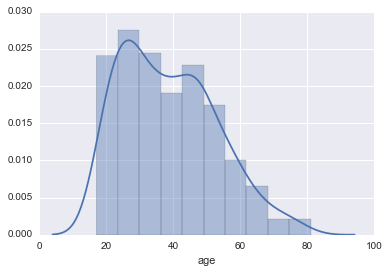

In [12]:
sns.distplot(df.age, bins=10)

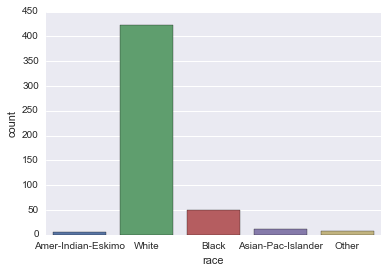

In [13]:
sns.countplot(x=df['race'],data=df)

### One categorical vs one numeric variable

For each value of "marital status", display the mean age

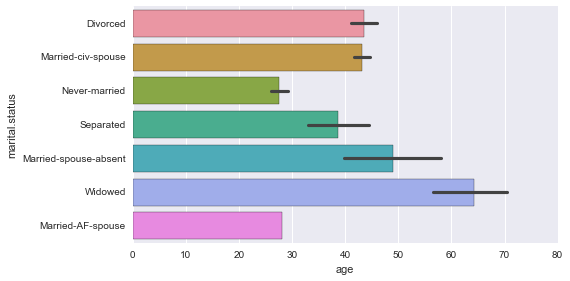

In [14]:
sns.factorplot(x='age',y='marital.status', data=df, kind='bar', aspect = 2)

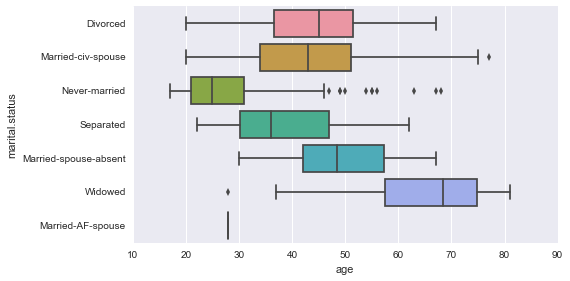

In [15]:
sns.factorplot(x='age',y='marital.status', data=df, kind='box', aspect = 2)

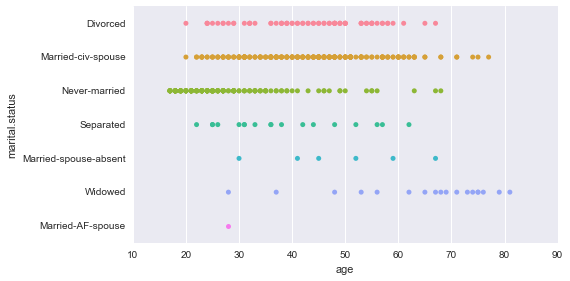

In [16]:
sns.factorplot(x='age',y='marital.status', data=df, kind='strip', aspect = 2)

### Two numeric variables (Regression)

A regression plot. Here there are no two numeric variables that are particularly strongly correlated

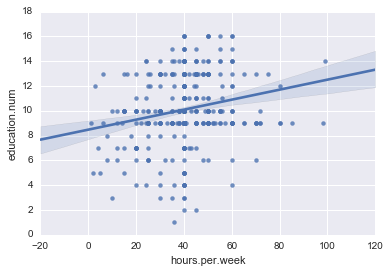

In [17]:
sns.regplot(x=df['hours.per.week'], y=df['education.num'])

### Two numeric variables (Line)

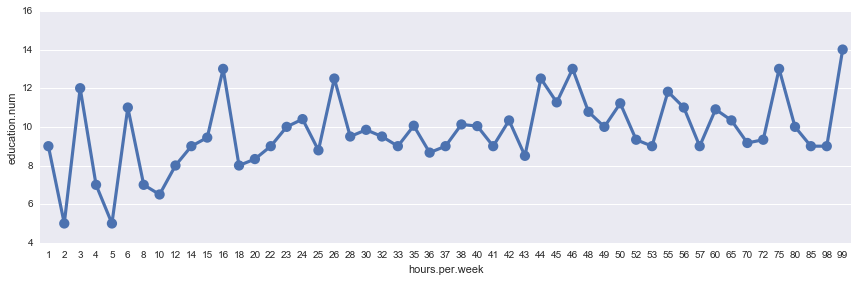

In [18]:
sns.factorplot(x='hours.per.week',y='education.num',data=df,kind='point', aspect = 3,ci=0)

### Two categorical variables vs one numeric variable

Show the mean age by sex and marital status

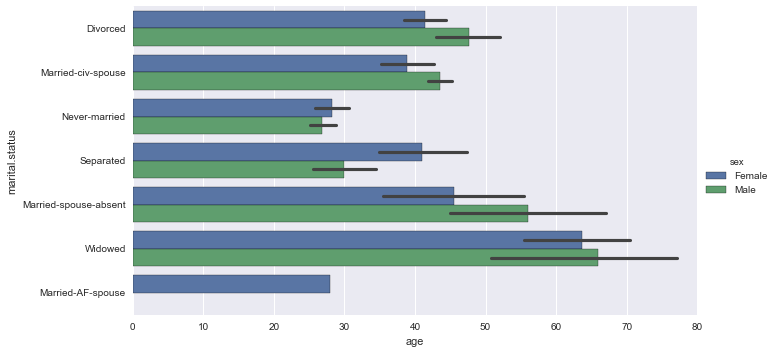

In [19]:
sns.factorplot(y='marital.status',x='age',data=df,hue='sex',kind='bar', size=5, aspect = 2)

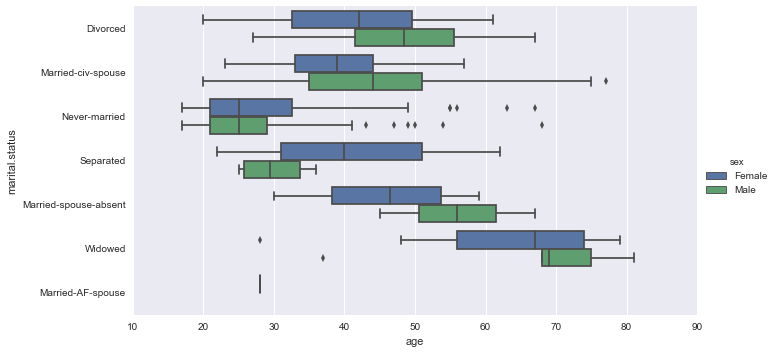

In [20]:
sns.factorplot(y='marital.status',x='age',data=df,hue='sex',kind='box', size=5, aspect = 2)

### Two numeric (age, education.num) and one categorical variables (sex)

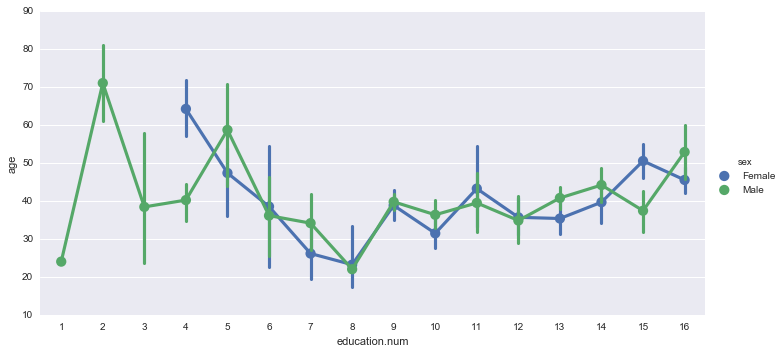

In [21]:
sns.factorplot(x='education.num',y='age',data=df,hue='sex',kind='point',size=5,aspect=2)

### Two categorical (better if ordinal) variables and one numeric variable

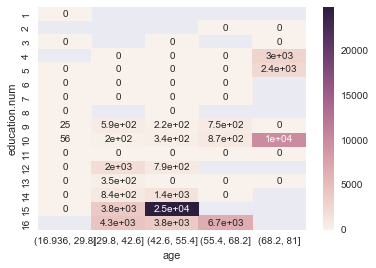

In [22]:
df2 = df.copy()
df2['age'] = pd.cut(df2.age, 5)
gr = df2.groupby(['education.num','age'])['capital.gain'].mean()
gr2 = gr.unstack()
sns.heatmap(gr2,annot = True)

### Four variables: two numeric and two categorical

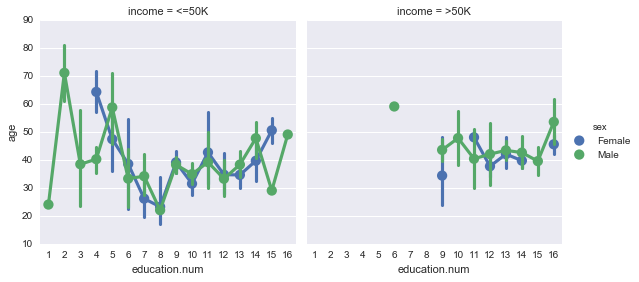

In [23]:
sns.factorplot(x='education.num',y='age',data=df,hue='sex',col='income',kind='point',aspect = 1)

### Four variables: one numeric and three categorical

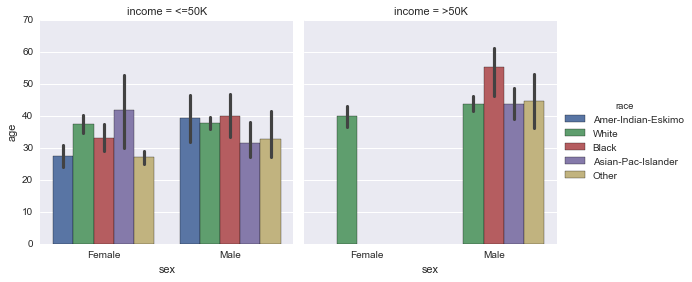

In [24]:
sns.factorplot(x='sex',y='age',data=df,hue='race',col='income',kind='bar')

### n numeric variables (Pairplots)

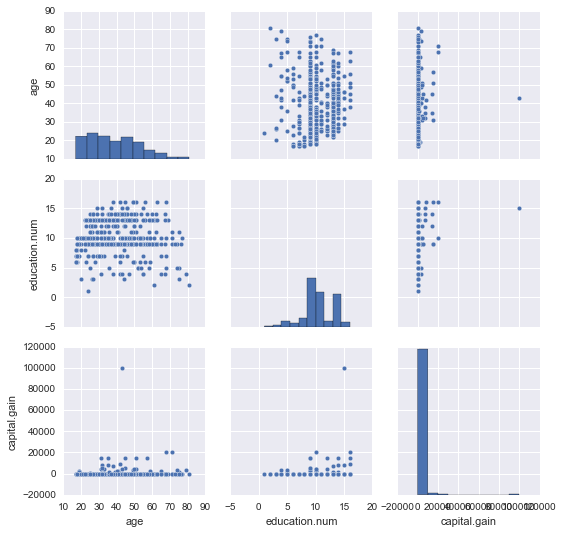

In [25]:
sns.pairplot(df[['age','education.num','capital.gain']])